In [300]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

# Problem-1

In [221]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\Wholesale+Customers+Data.csv')

In [65]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [222]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [16]:
df.isnull().sum().any()

False

In [45]:
df.shape

(440, 9)

In [451]:
#1.1. Use methods of descriptive statistics to summarize data.
#Which Region and which Channel seems to spend more?
#Which Region and which Channel seems to spend less?

df.Region.value_counts()


Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [443]:
df.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [508]:
df.describe(include = 'all')


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [244]:
#1.2. There are 6 different varieties of items are considered.
#Do all varieties show similar behaviour across Region and Channel?
desc = df.describe().round()
desc

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.0,440.0,440.0,440.0,440.0,440.0,440.0
mean,220.0,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
std,127.0,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
min,1.0,3.0,55.0,3.0,25.0,3.0,3.0
25%,111.0,3128.0,1533.0,2153.0,742.0,257.0,408.0
50%,220.0,8504.0,3627.0,4756.0,1526.0,816.0,966.0
75%,330.0,16934.0,7190.0,10656.0,3554.0,3922.0,1820.0
max,440.0,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


In [378]:
#For much deeper insights lets have a glance over Region and Channel as well

desc2 = pd.crosstab(df['Region'],df['Channel'])
desc2

Channel,Hotel,Retail
Region,,
Lisbon,59,18
Oporto,28,19
Other,211,105


In [379]:
desc2['Hotel'].describe(include = 'all').round()


count      3.0
mean      99.0
std       98.0
min       28.0
25%       44.0
50%       59.0
75%      135.0
max      211.0
Name: Hotel, dtype: float64

In [380]:
desc2['Retail'].describe(include = 'all').round()

count      3.0
mean      47.0
std       50.0
min       18.0
25%       18.0
50%       19.0
75%       62.0
max      105.0
Name: Retail, dtype: float64

In [464]:
desc3 = pd.crosstab(df['Channel'],df['Region'])
desc3

Region,Lisbon,Oporto,Other
Channel,,,
Hotel,59,28,211
Retail,18,19,105


In [465]:
desc3['Other'].describe().round()

count      2.0
mean     158.0
std       75.0
min      105.0
25%      132.0
50%      158.0
75%      184.0
max      211.0
Name: Other, dtype: float64

In [466]:
desc3['Oporto'].describe().round()

count     2.0
mean     24.0
std       6.0
min      19.0
25%      21.0
50%      24.0
75%      26.0
max      28.0
Name: Oporto, dtype: float64

In [467]:
desc3['Lisbon'].describe().round()

count     2.0
mean     38.0
std      29.0
min      18.0
25%      28.0
50%      38.0
75%      49.0
max      59.0
Name: Lisbon, dtype: float64

In [383]:
#1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?
#Which items shows the least inconsistent behaviour?
mean = df.mean().round()
mean


Buyer/Spender         220.0
Fresh               12000.0
Milk                 5796.0
Grocery              7951.0
Frozen               3072.0
Detergents_Paper     2881.0
Delicatessen         1525.0
dtype: float64

In [255]:
df.median().round()

Buyer/Spender        220.0
Fresh               8504.0
Milk                3627.0
Grocery             4756.0
Frozen              1526.0
Detergents_Paper     816.0
Delicatessen         966.0
dtype: float64

In [250]:
df.mode().head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Hotel,Other,3.0,577.0,683.0,133.0,3.0,3.0
1,2,NaN,NaN,514.0,659.0,1493.0,364.0,20.0,834.0
2,3,NaN,NaN,3366.0,829.0,1563.0,402.0,56.0,NaN
3,4,NaN,NaN,7149.0,899.0,1664.0,425.0,69.0,NaN
4,5,NaN,NaN,8040.0,944.0,2062.0,744.0,70.0,NaN


In [382]:
std = df.std().round()
std

Buyer/Spender         127.0
Fresh               12647.0
Milk                 7380.0
Grocery              9503.0
Frozen               4855.0
Detergents_Paper     4768.0
Delicatessen         2820.0
dtype: float64

In [254]:
df.var().round()

Buyer/Spender           16170.0
Fresh               159954927.0
Milk                 54469967.0
Grocery              90310104.0
Frozen               23567853.0
Detergents_Paper     22732436.0
Delicatessen          7952997.0
dtype: float64

In [510]:
print(df.skew())

Buyer/Spender        0.000000
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64


In [399]:
#coefficent of variation interpretation
Cov = std/mean
Cov


Buyer/Spender       0.577273
Fresh               1.053917
Milk                1.273292
Grocery             1.195196
Frozen              1.580404
Detergents_Paper    1.654981
Delicatessen        1.849180
dtype: float64

Most inconsistent is 'Fresh' = 1.053917

Least inconsistent is  'Delicatessen '  = 1.849180

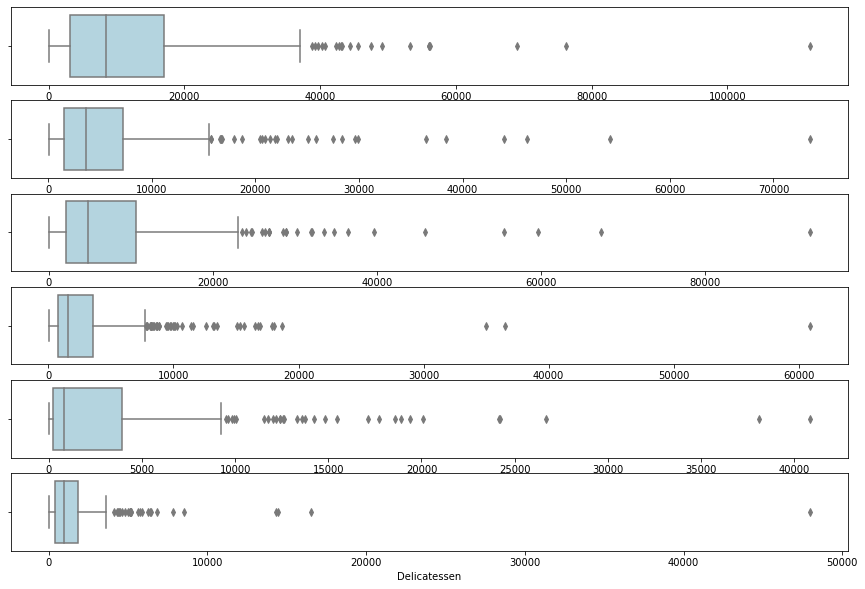

In [483]:
#1.4. Are there any outliers in the data?
plt.figure(figsize = (15,10))

plt.subplot(6,1,1)
sns.boxplot(x = df.Fresh, color = 'lightblue')

plt.subplot(6,1,2)
sns.boxplot(x = df.Milk, color = 'lightblue')

plt.subplot(6,1,3)
sns.boxplot(x = df.Grocery, color = 'lightblue')

plt.subplot(6,1,4)
sns.boxplot(x = df.Frozen, color = 'lightblue')

plt.subplot(6,1,5)
sns.boxplot(x = df.Detergents_Paper, color = 'lightblue')

plt.subplot(6,1,6)
sns.boxplot(x = df.Delicatessen, color = 'lightblue')

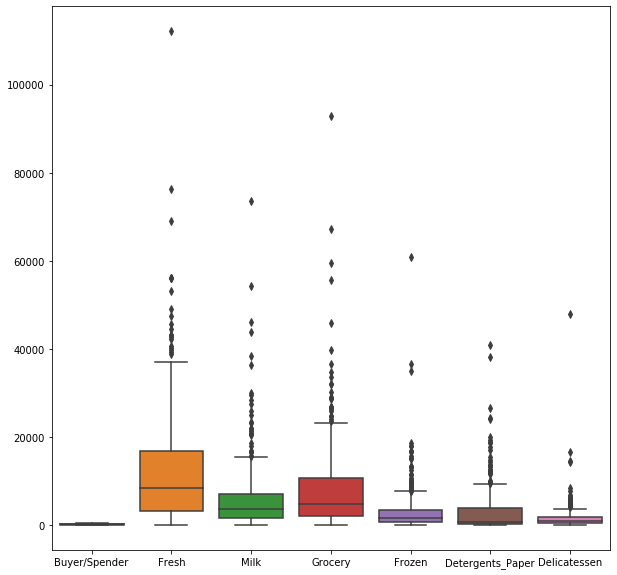

In [489]:
#using seaborne
sns.boxplot(data = df)
plt.rcParams['figure.figsize'] = (10,10)

In [406]:
# 1.5. On the basis of this report, what are the recommendations?

#answer in business report


# Problem-2

In [259]:
df2 = pd.read_csv(r'C:\Users\Hp\Downloads\Survey.csv')

df2.info()

df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


(62, 14)

In [101]:
#2.1. For this data, construct the following contingency tables (Keep Gender as row variable) 
#2.1.1. Gender and Major 
#2.1.2. Gender and Grad Intention 
#2.1.3. Gender and Employment 
#2.1.4. Gender and Computer
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [64]:
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [60]:
pd.crosstab(df2['Gender'],df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [59]:
pd.crosstab(df2['Gender'],df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [76]:
#2.2.1. Assume that the sample is a representative of the population of CMSU. 
#Based on the data, answer the following question: 
#What is the probability that a randomly selected CMSU student will be male? 
#What is the probability that a randomly selected CMSU student will be female?
df2['Gender'].value_counts()


Female    33
Male      29
Name: Gender, dtype: int64

In [261]:
m = 29
t = 62
prob_male = m/t
prob_male


0.46774193548387094

In [185]:
f = 33
t = 62
prob_female = f/t
prob_female

0.532258064516129

In [108]:
#2.2.2. Assume that the sample is a representative of the population of CMSU. 
#Based on the data, answer the following question: 
#Find the conditional probability of different majors among the male students in CMSU. 
#Find the conditional probability of different majors among the female students of CMSU.
df2['Major'].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Accounting                 7
Other                      7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [411]:
prob_Retailing_Marketing_males = 5/62      #from contigency table of Major (cond_prob = (r|m) = 5/29) 
prob_male = 29/62  
prob_Retailing_Marketing_among_males = prob_Retailing_Marketing_males/prob_male    #which is 5/29
prob_Retailing_Marketing_among_males



0.1724137931034483

In [412]:
prob_Retailing_Marketing_females = 9/62
prob_female = 33/62
prob_Retailing_Marketing_among_females = (prob_Retailing_Marketing_females)/prob_female    #which is 9/33
prob_Retailing_Marketing_among_females

0.27272727272727276

In [409]:
prob_Economics_Finance_males = 4/62
prob_male = 29/62   #from contigency table of Major
prob_Retailing_Marketing_among_males = (prob_Economics_Finance_males)/prob_male    #prob-male from #2.2.1
prob_Retailing_Marketing_among_males

0.13793103448275862

In [408]:
prob_Economics_Finance_females = 7/62
prob_female = 33/62  #from contigency table of Major
prob_Retailing_Marketing_among_females = (prob_Economics_Finance_females)/prob_female    #prob-female from #2.2.1
prob_Retailing_Marketing_among_females

0.21212121212121213

In [175]:
prob_management_males = 6/62
prob_male = 29/62
prob_management_among_males = (prob_management_males)/prob_male                    #in denominator prob of male is 29/62
prob_management_among_males

0.20689655172413793

In [171]:
prob_management_females = 4/62
prob_female = 33/62
prob_management_among_females = (prob_management_females)/prob_female              ##in denominator prob of female is 33/62
prob_management_among_females

0.12121212121212122

In [181]:
prob_accounting_males = 4/62
prob_accounting_among_males = (prob_accounting_males)/prob_male
prob_accounting_among_males

0.13793103448275862

In [186]:
prob_accounting_females = 3/62
prob_accounting_among_females = (prob_accounting_females)/prob_female
prob_accounting_among_females

0.09090909090909091

In [188]:
prob_other_males = 4/62
prob_other_among_males = (prob_other_males)/prob_male
prob_other_among_males

0.13793103448275862

In [189]:
prob_other_females = 3/62
prob_other_among_females = (prob_other_females)/prob_female
prob_other_among_females

0.09090909090909091

In [191]:
prob_intrntlbusiness_males = 2/62
prob_intrntlbusiness_among_males = (prob_intrntlbusiness_males)/prob_male
prob_intrntlbusiness_among_males

0.06896551724137931

In [192]:
prob_intrntlbusiness_females = 4/62
prob_intrntlbusiness_among_females = (prob_intrntlbusiness_females)/prob_female
prob_intrntlbusiness_among_females

0.12121212121212122

In [194]:
prob_CIS_males = 1/62
prob_CIS_among_males = (prob_CIS_males)/prob_male
prob_CIS_among_males

0.034482758620689655

In [196]:
prob_CIS_females = 3/62
prob_CIS_among_females = (prob_CIS_females)/prob_female
prob_CIS_among_females

0.09090909090909091

In [198]:
prob_undecided_males = 3/62
prob_undecided_among_males = (prob_undecided_males)/prob_male
prob_undecided_among_males

0.10344827586206896

In [199]:
prob_undecided_females = 0/62
prob_undecided_among_females = (prob_undecided_females)/prob_female
prob_undecided_among_females

0.0

In [513]:
#2.2.3. Assume that the sample is a representative of the population of CMSU. 
#Based on the data, answer the following question: 
#Find the conditional probability of intent to graduate, given that the student is a male. 
#Find the conditional probability of intent to graduate, given that the student is a female.
prob_int_grad_male_yes = 17
total_male_yes = 29
cond_prob_int_grad_given_male_yes = prob_int_grad_male_yes/total_male_yes
cond_prob_int_grad_given_male_yes

0.5862068965517241

In [514]:
prob_int_grad_female_yes = 11
total_female_yes = 33
cond_prob_int_grad_given_female_yes = prob_int_grad_female_yes/total_female_yes
cond_prob_int_grad_given_female_yes

0.3333333333333333

In [515]:
prob_int_grad_male_no = 3
total_male_no = 29
cond_prob_int_grad_given_male_no = prob_int_grad_male_no/total_male_no
cond_prob_int_grad_given_male_no

0.10344827586206896

In [516]:
prob_int_grad_female_no = 9
total_female_no = 33
cond_prob_int_grad_given_female_no = prob_int_grad_female_no/total_female_no
cond_prob_int_grad_given_female_no

0.2727272727272727

In [517]:
prob_int_grad_male_undec = 9
total_male_undec = 29
cond_prob_int_grad_given_male_undec = prob_int_grad_male_undec/total_male_undec
cond_prob_int_grad_given_male_undec

0.3103448275862069

In [518]:
prob_int_grad_female_undec = 13
total_female_undec = 33
cond_prob_int_grad_given_female_undec = prob_int_grad_female_undec/total_female_undec
cond_prob_int_grad_given_female_undec

0.3939393939393939

In [520]:
#2.2.4. Assume that the sample is a representative of the population of CMSU. 
#Based on the data, answer the following question: 
#Find the conditional probability of employment status for the male students as well as for the female students.
df2['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [202]:
prob_parttime_males = 19/62
prob_parttime_among_males = (prob_parttime_males)/prob_male     #which is 19/29
prob_parttime_among_males

0.6551724137931035

In [413]:
prob_parttime_females = 24/62
prob_parttime_among_females = (prob_parttime_females)/prob_female   #which is 24/33
prob_parttime_among_females

0.7272727272727273

In [204]:
prob_fulltime_males = 7/62
prob_fulltime_among_males = (prob_fulltime_males)/prob_male
prob_fulltime_among_males

0.2413793103448276

In [205]:
prob_fulltime_females = 3/62
prob_fulltime_among_females = (prob_fulltime_females)/prob_female
prob_fulltime_among_females

0.09090909090909091

In [206]:
prob_unemployed_males = 3/62
prob_unemployed_among_males = (prob_unemployed_males)/prob_male
prob_unemployed_among_males

0.10344827586206896

In [207]:
prob_unemployed_females = 6/62
prob_unemployed_among_females = (prob_unemployed_females)/prob_female
prob_unemployed_among_females

0.18181818181818182

In [209]:
#2.2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, 
#answer the following question: 
#Find the conditional probability of laptop preference among the male students as well as among the female students.
prob_laptop_pref_males = 26/62
prob_laptop_pref_among_males = (prob_laptop_pref_males)/prob_male
prob_laptop_pref_among_males

0.8965517241379312

In [210]:
prob_laptop_pref_females = 29/62
prob_laptop_pref_among_females = (prob_laptop_pref_females)/prob_female
prob_laptop_pref_among_females

0.8787878787878788

In [421]:
#2.3. Based on the above probabilities, 
#do you think that the column variable in each case is independent of Gender? Justify your comment in each case.

#answer in Business report

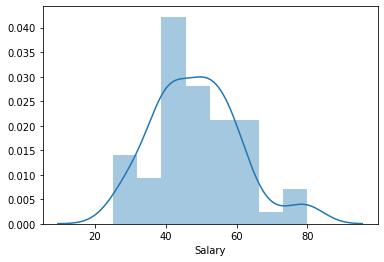

In [279]:
#2.4. Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. 
#For each of them comment whether they follow a normal distribution. 
#Write a note summarizing your conclusions. 
#[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
sns.distplot(df2['Salary'],kde = True)

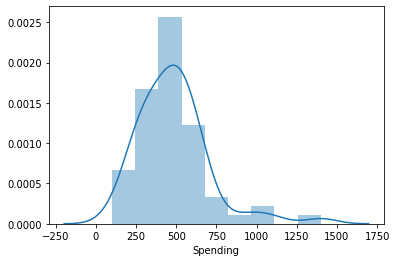

In [280]:
sns.distplot(df2['Spending'],kde = True)

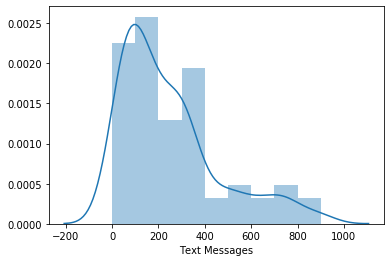

In [281]:
sns.distplot(df2['Text Messages'],kde = True)

# Problem-3

In [431]:
df3 = pd.read_csv(r'C:\Users\Hp\Downloads\A+&+B+shingles.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [318]:
df3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [511]:
#3.1 Do you think that the population means for shingles A and B are equal? 
#Form the hypothesis and 
#conduct the test of the hypothesis. 
#What assumption do you need to check before the test for equality of means is performed?performing paired t-test
print('From the above table population means and counts are not equal so they are unpaired samples')
    
print('lets find the mean difference of both sample')




From the above table population means and counts are not equal so they are unpaired samples
lets find the mean difference of both sample


In [479]:
#mean difference of both the samples
mean_A = df3['A'].mean()
mean_B = df3['B'].mean()
mean_diff = mean_A - mean_B
mean_diff

0.04311827956989239

Clearly mean difference of both samples is equal = 0, but lets test it hypothetically by performing hypothesis test

In [492]:
std_A = df3['A'].std()
std_B = df3['B'].std()
print(std_A,std_B)

0.13573082605973166 0.13729647694185443


Hypothesis

Ho : MuA-MuB = 0

Ha : MuA-MuB != 0

In [468]:
t, p_value = stats.ttest_ind(df3['A'],df3['B'], nan_policy='omit')
print(t, p_value)

1.2896282719661123 0.2017496571835306


In [469]:
print('The T statistic is :',t,'\n''The corresponding pvalue is:',p_value)

The T statistic is : 1.2896282719661123 
The corresponding pvalue is: 0.2017496571835306


From above test, the p_value>0.05,so we fail to reject null hypothesis, clearly population means of both are equal and Hence the mean of moisture content is not greater than 0.35%, the claim of the company is True.  

In [423]:
#3.2 What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

print('assumptions:')
print('two means have to be equal')            
print('Homogeneity of variances (variances are almost equal between two samples),Observations in two groups are sampled independently from each other')
print('The mean difference is calculation which is revealed by the t value = is the ratio of mean difference where denominator talks about the measurement of dispersion or variabilityto check for the normality of distribution')
     

assumptions:
two means have to be equal
Homogeneity of variances (variances are almost equal between two samples),Observations in two groups are sampled independently from each other
The mean difference is calculation which is revealed by the t value = is the ratio of mean difference where denominator talks about the measurement of dispersion or variabilityto check for the normality of distribution


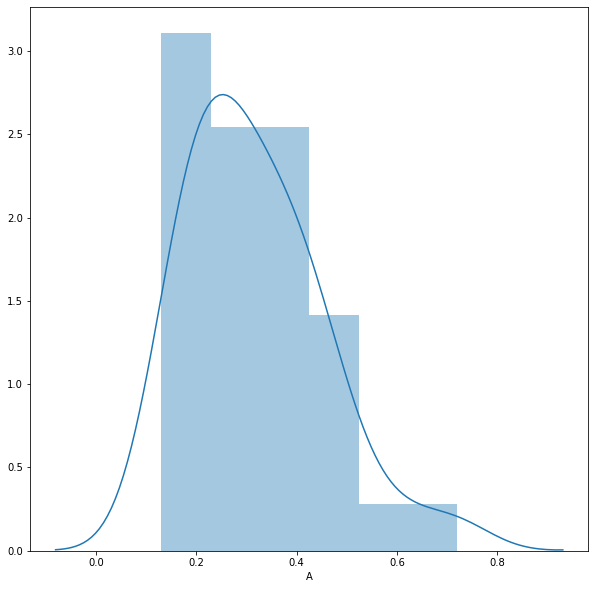

In [496]:
#check for normality
sns.distplot(df3['A'])

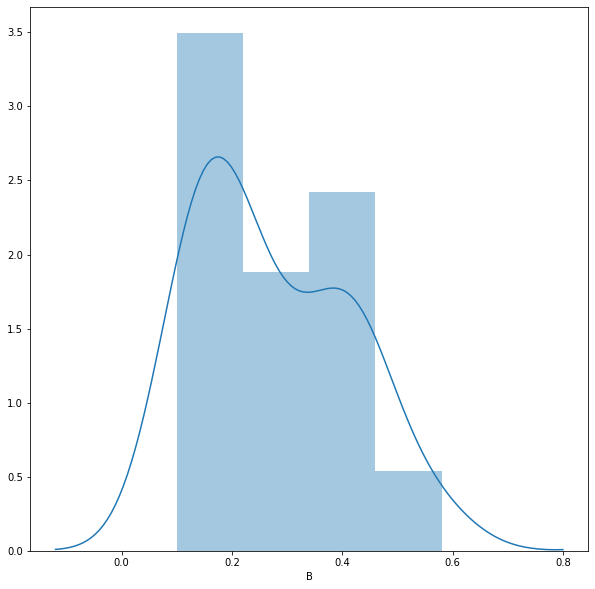

In [497]:
sns.distplot(df3['B'])